# Testnootbook


In [1]:
from PIL import Image, ImageOps
import torch
import numpy as np

In [2]:
im_size =[192,192]
mask_path = 'dataset/mini_testdatensatz/segmentation_images/picture_1.png'
img_path = 'dataset/mini_testdatensatz/train/picture_1.png'

In [3]:
def img_patch(img,segmentation=False):
        # Calculate the aspect ratio of the image
        img_ratio = img.width / img.height

        # If the image is wider than it is high
        if img_ratio > 1:
            # Scale the width to the desired size and calculate the height while maintaining the aspect ratio
            new_width = im_size[0]
            new_height = int(new_width / img_ratio)
        # If the image is taller than it is wide
        else:
            # Scale the height to the desired size and calculate the width while maintaining the aspect ratio
            new_height = im_size[1]
            new_width = int(new_height * img_ratio)

        # Resize the image to the calculated size while maintaining the aspect ratio
        img = img.resize((new_width, new_height), resample=Image.BICUBIC)

        # Add black borders to the left and right or top and bottom of the image to make it the desired size
        delta_w = im_size[0] - new_width
        delta_h = im_size[1] - new_height
        pad_width = delta_w // 2
        pad_height = delta_h // 2
        padding = (pad_width, pad_height, delta_w - pad_width, delta_h - pad_height)
        if segmentation:
            img = ImageOps.expand(img, border=padding, fill=(0))
        else:
            img = ImageOps.expand(img, border=padding, fill=(255,255,255))

        # Return the scaled and centered image
        return img

In [4]:
# Achtung, mask und mask tensor sind nur auf Grund der Visualisierung von mask aufkommentiert, im echten Code nicht
def img_segmention2(mask_path):

    mask = Image.open(mask_path).convert('1')
    mask = img_patch(mask,segmentation=True) # problem with the color --> we only need one channel
    # mask = np.array(mask)
    # mask_tensor = torch.from_numpy(mask)

    #return mask_tensor, mask
    return mask

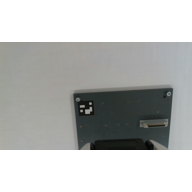

In [5]:
img = Image.open(img_path)
img = img_patch(img)
display(img)


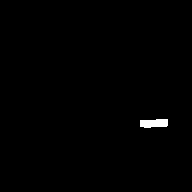

In [7]:
mask = img_segmention2(mask_path)
display(mask)